# Ford GoBike Data Investigation
## By Kaspar Lee

## Investigation Overview

Through this presentation, I will communicate the findings I have obtained from analysing a large dataset about Ford GoBike trips, including what variables have an impact on number of trips taken and trip duration.

## Dataset Overview

The dataset contains 519,700 entries, each of which is data about an individual trip made on a Ford GoBike, and includes data about the user type (whether they are a subscriber or a one-off customer), gender, birth year, start and end times, trip duration and locations.

In [8]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# Import data as Pandas DataFrame
df = pd.read_csv('2017-fordgobike-tripdata.csv')

## Trip Duration Distributions

The duration of trips tended to be different depending on what the bikes were used for. Typically, subscribers use the bikes more and therefore commuters are likely to be subscribers. When we look at how trip durations are distributed, it is clear that the majority of trips for subscribers lie around 500 seconds (8m 20s), with very few trips above 1000 seconds (16m 40s).

Contrary to this, the distribution for one-off customer trips is much wider, with a larger median and relatively more trips being made with higher durations, as indicated from the violin plot.

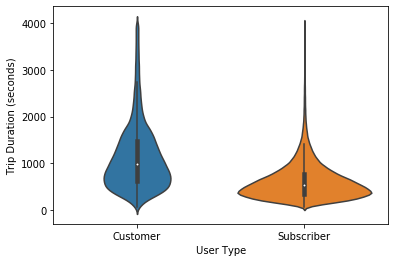

In [10]:
ax = sns.violinplot(data=df.query('duration_sec <= 4000'), x='user_type', y='duration_sec')
ax.set_xlabel('User Type')
ax.set_ylabel('Trip Duration (seconds)');

## Trip Durations, by Start Time and User Type

It appears that for subscribers, no matter the start time (other than 3am), there is almost no variation in the average duration the trip takes. In contrast, trip durations for customers vary significantly, with trips made during the early morning (before 5am) lasting the longest on average, and the shortest trips occurring during morning rush hour, possibility due to the bikes being used for commutes during those times and not for leisurely purposes.

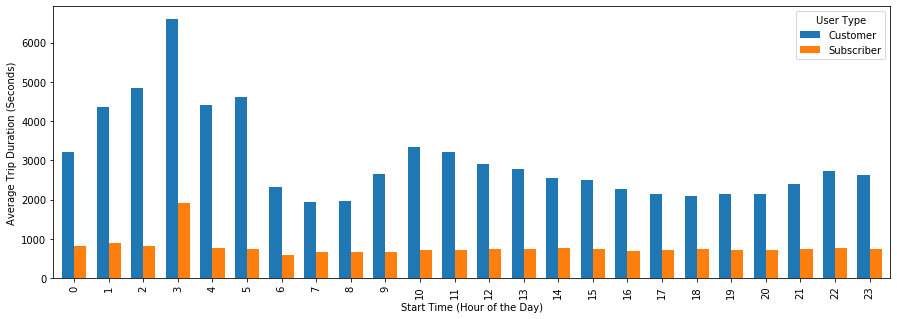

In [12]:
# Convert start_time and end_time variables to datetime64 data type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df['start_hour'] = df.start_time.dt.hour

duration_means = df[['duration_sec', 'start_hour', 'user_type']].groupby(['start_hour', 'user_type']).mean()
duration_means.unstack().plot.bar(width=0.7, figsize=(15, 5))
plt.xlabel('Start Time (Hour of the Day)')
plt.ylabel('Average Trip Duration (Seconds)')
plt.legend(['Customer', 'Subscriber'], title='User Type');

## Number of Trips Taken Over Time, by Gender

During June and July, there were relatively few trips taken. This could be due to the scheme having just started out and not being particularly well known or popular yet. When we look at how the number of trips increased by gender, it is clear that for all genders they increased relatively evenly. Bar November, each month had more trips made than the last, indicating that Ford GoBikes are becoming more popular over time.

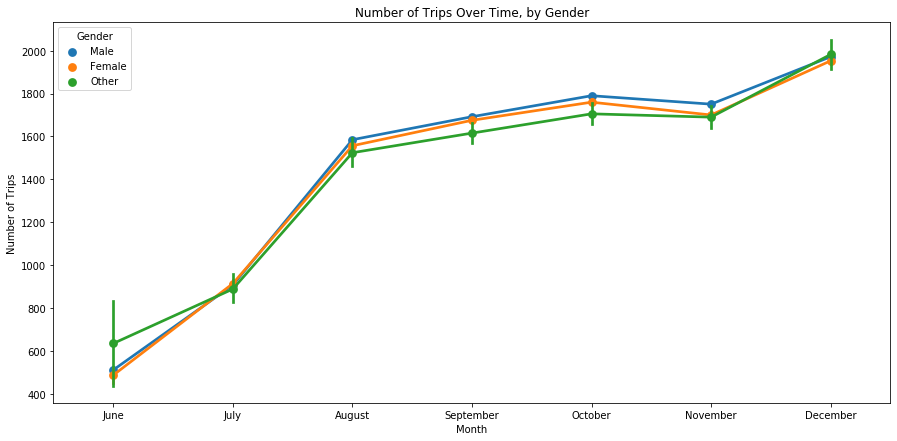

In [15]:
df['start_month'] = df.start_time.dt.month

plt.figure(figsize = (15, 7))
sb.pointplot(data=df, x='start_month', y='bike_id', hue='member_gender')
plt.title('Number of Trips Over Time, by Gender')
plt.legend(title='Gender')
plt.xlabel('Month')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=['June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('Number of Trips');